# [Northeastern](https://www.northeastern.edu/) final project  

# Predicting heart diseases ❤️

This notebook uses this [Kaggle data set](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv)

## Importing modules and data 📥

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
heart_df = pd.read_csv('/work/archive-20220531-152154/heart_2020_cleaned.csv') 

In [3]:
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Exploratory Data Analysis 🚀

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [20]:
heart_df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [21]:
heart_df['MentalHealth'].value_counts()

0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

In [5]:
#understand characteristics of your data
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
heart_df.shape

(319795, 18)

The code block above ⬆️ tells us that there are 319795 rows (onservations) and 18 columns in the data set.

In [7]:
# Are there any missing values?
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Exploratory Data Visualization 📈

I used ["data to viz"](https://www.data-to-viz.com/) cite to explore various varibales visually

### Visualizing Distribution

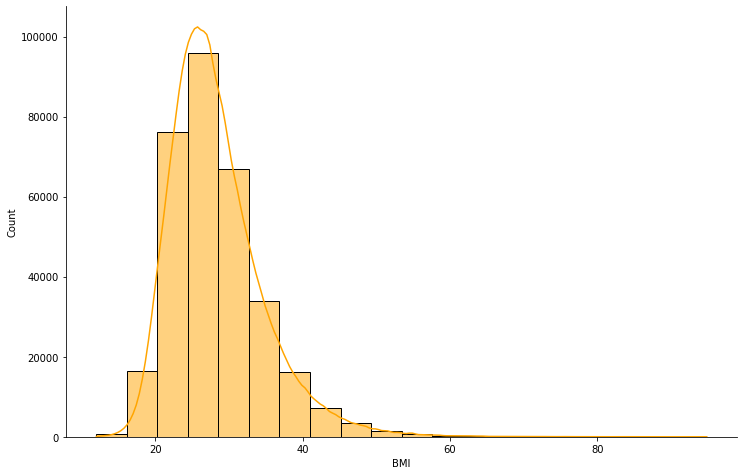

In [8]:
 g = sns.displot(heart_df['BMI'],
            color="orange",
            kde=True, # disables kde
            bins=20)
g.fig.set_figwidth(12) # increases the width of Seaborn chart
g.fig.set_figheight(7) # increases the height of Seaborn chart

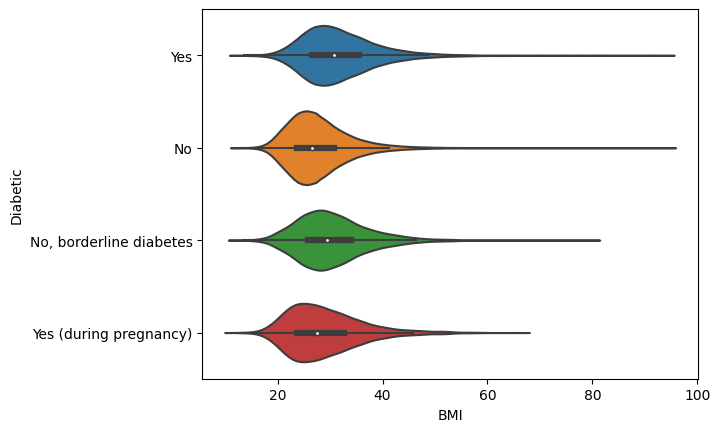

In [10]:

#A violin plot allow to visualize the distribution of a numeric variable for one or several groups
# plot
sns.violinplot(y=heart_df["Diabetic"], x=heart_df["BMI"])
plt.show()

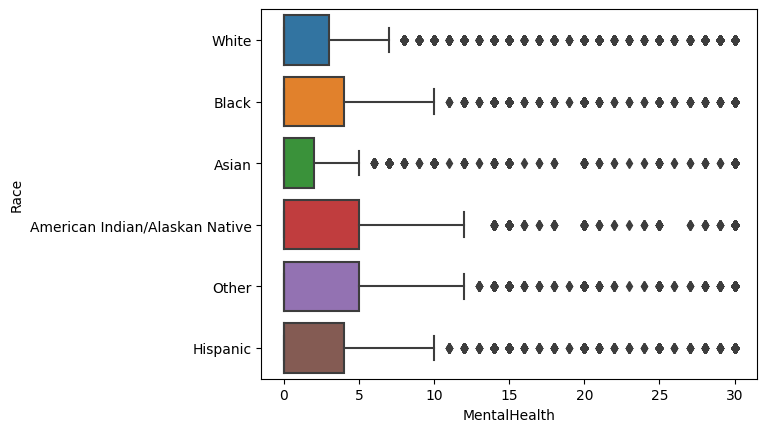

In [19]:
# Distribution of mental health across races

sns.boxplot(x="MentalHealth", y="Race", data = heart_df);

### Visualizing descriptive statistics

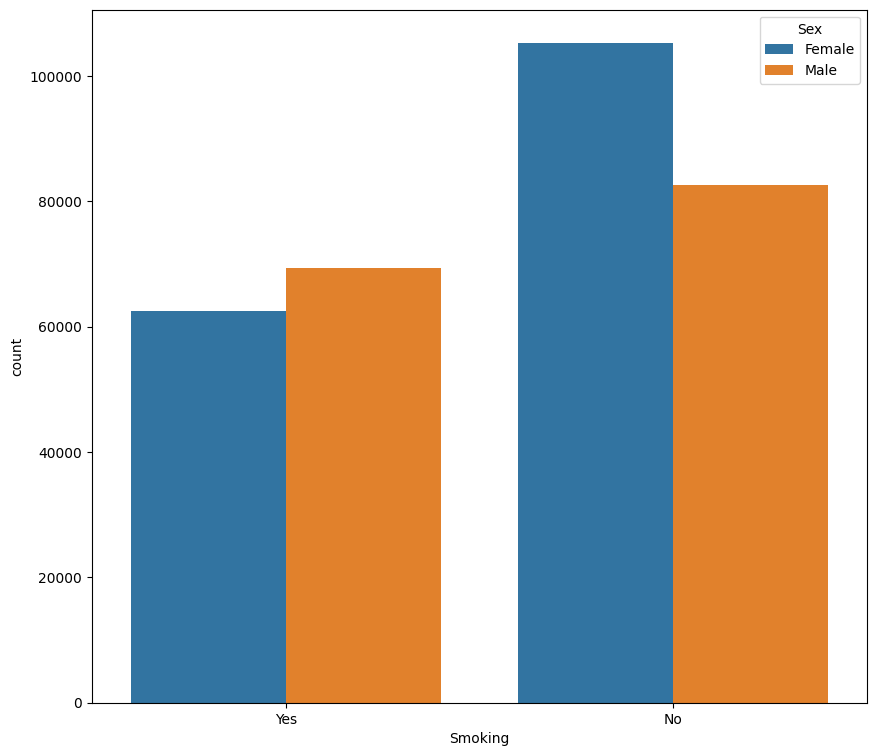

In [12]:
ax, fig = plt.subplots(figsize=[10,9]) # sets figure size
sns.countplot(x='Smoking', hue='Sex', data=heart_df) # for purely categorical
plt.show()

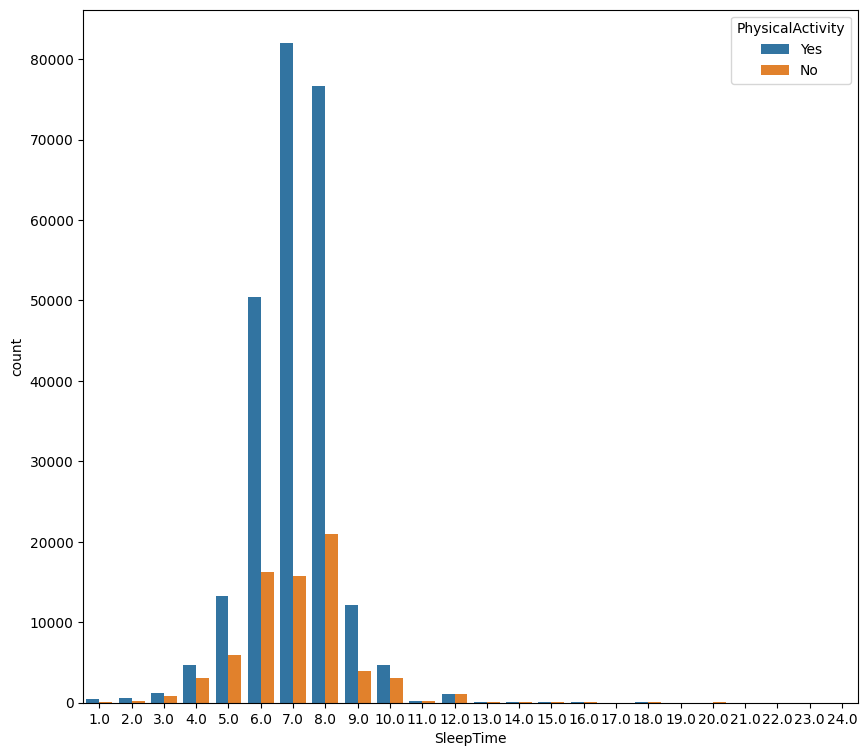

In [13]:
ax, fig = plt.subplots(figsize=[10,9]) # sets figure size
sns.countplot(x='SleepTime', hue='PhysicalActivity', data=heart_df) # for purely categorical
plt.show()

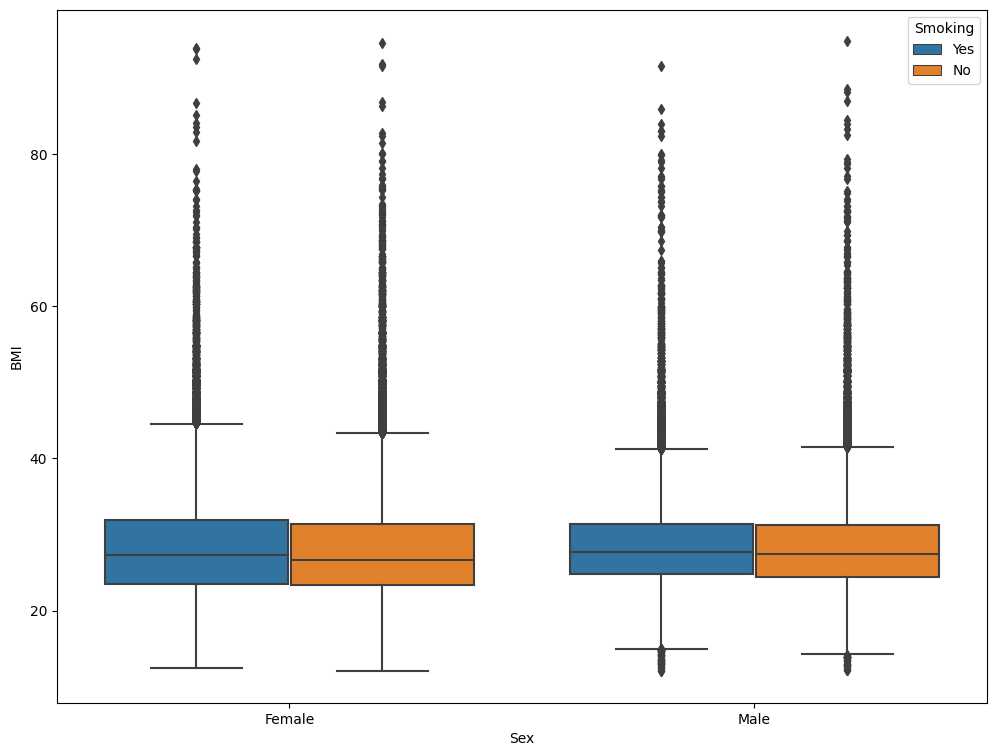

In [14]:
ax, fig = plt.subplots(figsize=[12,9]) # sets figure size
sns.boxplot(y='BMI', x='Sex',hue='Smoking', data=heart_df)
plt.show()

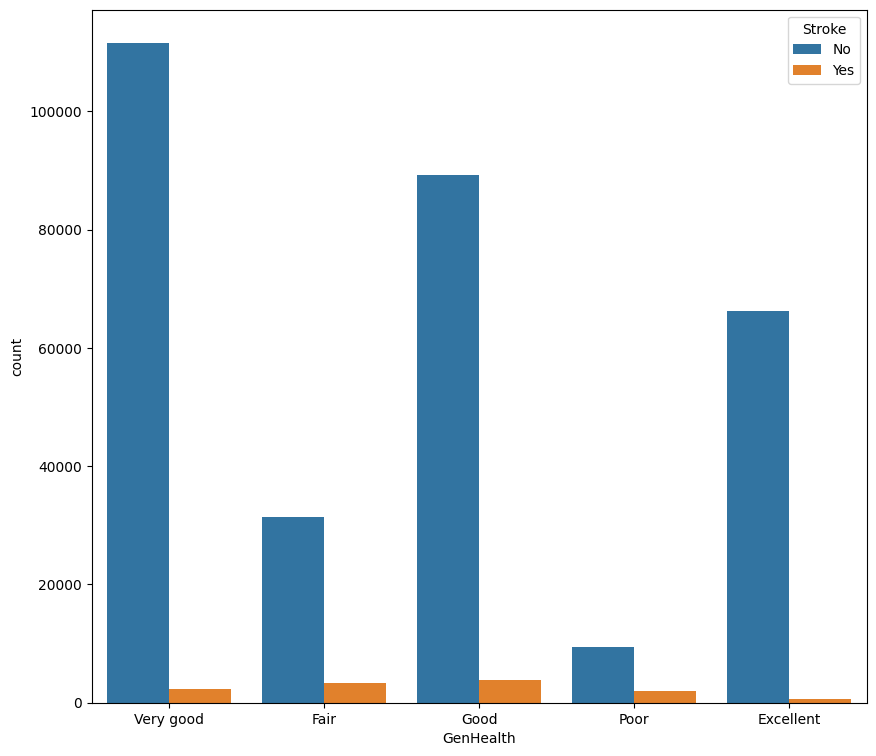

In [15]:
ax, fig = plt.subplots(figsize=[10,9]) # sets figure size
sns.countplot(x='GenHealth', hue='Stroke', data=heart_df) # for purely categorical
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5032a196-dce0-4509-a217-2b2b4586d05b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>